In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
import spacy
from spacy.matcher import Matcher
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.probability import FreqDist
from collections import Counter
nltk.download('wordnet')
import numpy

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/chaitanyadeepikakudupudi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
reviews = pd.read_csv('yelp_kimos.csv')

In [3]:
reviews = reviews[:-1]
reviews

,Date,Rating,Review,Name,Location,Rating_v1
0,9/28/2017,4.0 star rating,I really liked their menu set up. Fresh fish ...,Amy E.,"Fremont, CA",4.0 star rating
1,9/19/2017,5.0 star rating,Went for dinner on our 1st night in Maui..my s...,Jill C.,"Puerto Real, Puerto Rico",4.0 star rating
2,9/17/2017,3.0 star rating,Beautiful beachfront restaurant in Lahaina tow...,Saleen D.,"San Diego, CA",4.0 star rating
3,8/31/2017,5.0 star rating,One of my My favorite restaurants in Maui wit...,Amber V.,"Las Vegas, NV",4.0 star rating
4,9/22/2017,4.0 star rating,"After lunch, we wanted to go people watch on t...",Dan O.,"Madison Heights, MI",4.0 star rating
...,...,...,...,...,...,...
2075,10/28/2008,4.0 star rating,"Okay so I used to work here, I'm completely bi...",Audrey S.,"Lahaina, HI",4.0 star rating
2076,9/17/2009,5.0 star rating,For our first family trip to the neighbor isla...,Leilani D.,"Waianae, HI",4.0 star rating
2077,2/18/2009,4.0 star rating,Kimo's has one of the best spots to watch the ...,Matt P.,"Los Angeles, CA",4.0 star rating
2078,10/14/2007,5.0 star rating,Lunch. Fish sandwich - Kimo's style (not spic...,Kanani P.,"San Francisco, CA",4.0 star rating


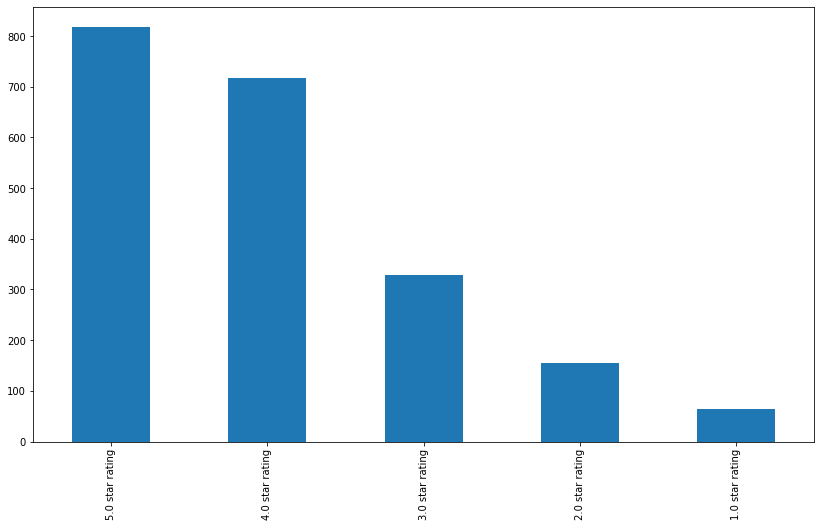

In [4]:
reviews['Rating'].value_counts().plot(kind='bar', figsize=(14,8));

In [5]:
reviews['Review'] = reviews['Review'].astype(str)
reviews['Rating'] = reviews['Rating'].str[:1].astype(int)

In [6]:
#Lowercasing all the review content to make data normalised and keep words in uniform 
reviews['Review'] = reviews['Review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [7]:
#removing special characters: Since these special characters create their own tokens and hence not usefull in any kind of 
#algorithm
reviews['review_new'] = reviews['Review'].str.replace('[^\w\s]','')

In [8]:
#removing stopwords from the reviews, because there words have no predictive power in reality
# for example: i, me, myself
stop = stopwords.words('english')
reviews['review_new'] = reviews['review_new'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [9]:
#Stemming: helps to gain relevant information as it reduces all words with the same roots to a 
#common form by removing suffixes such as -action, ing, -es and -ses.
#BUT  there can be problematic where there are spelling errors.

st = PorterStemmer()
reviews['review_stemmer'] = reviews['review_new'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))


#LEMMATIZING: creates a common word reducing the use of tenses which likely removes suffixes
lem = WordNetLemmatizer()
reviews['review_lemmatizer'] = reviews['review_stemmer'].apply(lambda x: " ".join([lem.lemmatize(word) for word in x.split()]))


In [10]:
reviews

,Date,Rating,Review,Name,Location,Rating_v1,review_new,review_stemmer,review_lemmatizer
0,9/28/2017,4,i really liked their menu set up. fresh fish s...,Amy E.,"Fremont, CA",4.0 star rating,really liked menu set fresh fish selection cha...,realli like menu set fresh fish select chang d...,realli like menu set fresh fish select chang d...
1,9/19/2017,5,went for dinner on our 1st night in maui..my s...,Jill C.,"Puerto Real, Puerto Rico",4.0 star rating,went dinner 1st night mauimy son 15 loves cook...,went dinner 1st night mauimi son 15 love cook ...,went dinner 1st night mauimi son 15 love cook ...
2,9/17/2017,3,beautiful beachfront restaurant in lahaina tow...,Saleen D.,"San Diego, CA",4.0 star rating,beautiful beachfront restaurant lahaina town b...,beauti beachfront restaur lahaina town beauti ...,beauti beachfront restaur lahaina town beauti ...
3,8/31/2017,5,one of my my favorite restaurants in maui with...,Amber V.,"Las Vegas, NV",4.0 star rating,one favorite restaurants maui view food die ob...,one favorit restaur maui view food die obvious...,one favorit restaur maui view food die obvious...
4,9/22/2017,4,"after lunch, we wanted to go people watch on t...",Dan O.,"Madison Heights, MI",4.0 star rating,lunch wanted go people watch boardwalk later g...,lunch want go peopl watch boardwalk later grab...,lunch want go peopl watch boardwalk later grab...
...,...,...,...,...,...,...,...,...,...
2075,10/28/2008,4,"okay so i used to work here, i'm completely bi...",Audrey S.,"Lahaina, HI",4.0 star rating,okay used work im completely biased eaten ever...,okay use work im complet bias eaten everyth me...,okay use work im complet bias eaten everyth me...
2076,9/17/2009,5,for our first family trip to the neighbor isla...,Leilani D.,"Waianae, HI",4.0 star rating,first family trip neighbor island maui place m...,first famili trip neighbor island maui place m...,first famili trip neighbor island maui place m...
2077,2/18/2009,4,kimo's has one of the best spots to watch the ...,Matt P.,"Los Angeles, CA",4.0 star rating,kimos one best spots watch sunset lounge area ...,kimo one best spot watch sunset loung area cre...,kimo one best spot watch sunset loung area cre...
2078,10/14/2007,5,lunch. fish sandwich - kimo's style (not spicy...,Kanani P.,"San Francisco, CA",4.0 star rating,lunch fish sandwich kimos style spicy cajun st...,lunch fish sandwich kimo style spici cajun sty...,lunch fish sandwich kimo style spici cajun sty...


In [11]:
#the first score is sentiment polarity which tells if the sentiment is positive or negative 
#and the second score is subjectivity score to tell how subjective is the text
def sentiment(x):
    return TextBlob(x).sentiment  

reviews['review_score'] = reviews['review_new'].apply(sentiment)

reviews

,Date,Rating,Review,Name,Location,Rating_v1,review_new,review_stemmer,review_lemmatizer,review_score
0,9/28/2017,4,i really liked their menu set up. fresh fish s...,Amy E.,"Fremont, CA",4.0 star rating,really liked menu set fresh fish selection cha...,realli like menu set fresh fish select chang d...,realli like menu set fresh fish select chang d...,"(0.3596590909090908, 0.575)"
1,9/19/2017,5,went for dinner on our 1st night in maui..my s...,Jill C.,"Puerto Real, Puerto Rico",4.0 star rating,went dinner 1st night mauimy son 15 loves cook...,went dinner 1st night mauimi son 15 love cook ...,went dinner 1st night mauimi son 15 love cook ...,"(0.75, 0.5875)"
2,9/17/2017,3,beautiful beachfront restaurant in lahaina tow...,Saleen D.,"San Diego, CA",4.0 star rating,beautiful beachfront restaurant lahaina town b...,beauti beachfront restaur lahaina town beauti ...,beauti beachfront restaur lahaina town beauti ...,"(0.20606060606060603, 0.6450757575757576)"
3,8/31/2017,5,one of my my favorite restaurants in maui with...,Amber V.,"Las Vegas, NV",4.0 star rating,one favorite restaurants maui view food die ob...,one favorit restaur maui view food die obvious...,one favorit restaur maui view food die obvious...,"(0.24363636363636365, 0.59)"
4,9/22/2017,4,"after lunch, we wanted to go people watch on t...",Dan O.,"Madison Heights, MI",4.0 star rating,lunch wanted go people watch boardwalk later g...,lunch want go peopl watch boardwalk later grab...,lunch want go peopl watch boardwalk later grab...,"(0.3017857142857143, 0.3834325396825397)"
...,...,...,...,...,...,...,...,...,...,...
2075,10/28/2008,4,"okay so i used to work here, i'm completely bi...",Audrey S.,"Lahaina, HI",4.0 star rating,okay used work im completely biased eaten ever...,okay use work im complet bias eaten everyth me...,okay use work im complet bias eaten everyth me...,"(0.4611542443064182, 0.5409247757073843)"
2076,9/17/2009,5,for our first family trip to the neighbor isla...,Leilani D.,"Waianae, HI",4.0 star rating,first family trip neighbor island maui place m...,first famili trip neighbor island maui place m...,first famili trip neighbor island maui place m...,"(0.2826704545454546, 0.5187499999999999)"
2077,2/18/2009,4,kimo's has one of the best spots to watch the ...,Matt P.,"Los Angeles, CA",4.0 star rating,kimos one best spots watch sunset lounge area ...,kimo one best spot watch sunset loung area cre...,kimo one best spot watch sunset loung area cre...,"(0.23190476190476192, 0.4373015873015873)"
2078,10/14/2007,5,lunch. fish sandwich - kimo's style (not spicy...,Kanani P.,"San Francisco, CA",4.0 star rating,lunch fish sandwich kimos style spicy cajun st...,lunch fish sandwich kimo style spici cajun sty...,lunch fish sandwich kimo style spici cajun sty...,"(-0.002499999999999991, 0.5575)"


In [12]:
# maintaining the data frame with polarity and subjectivity
reviews[['polarity', 'subjectivity']] = pd.DataFrame(reviews['review_score'].tolist(), index=reviews.index)

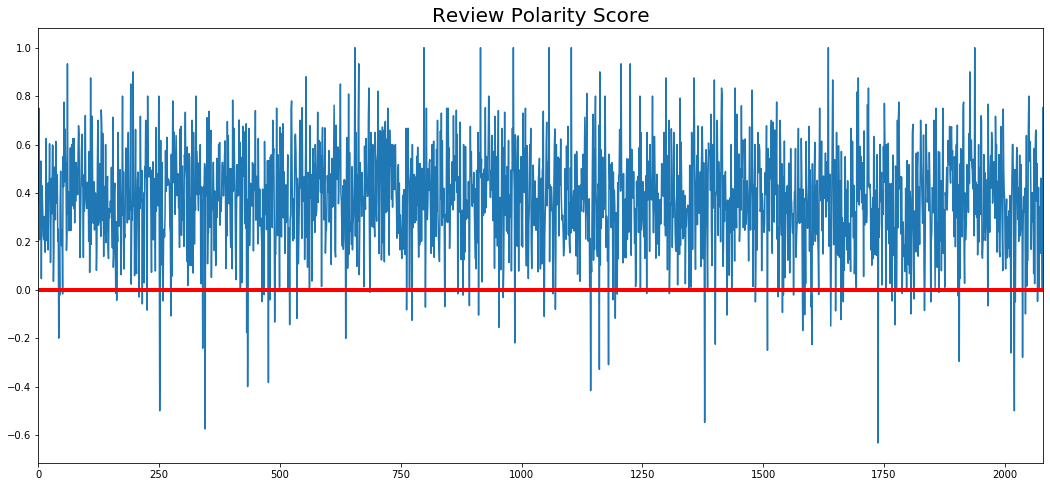

In [13]:
reviews['polarity'].plot(figsize=(18,8));
plt.title('Review Polarity Score',fontsize = 20);
plt.axhline(y=0, linewidth=4, color='r');

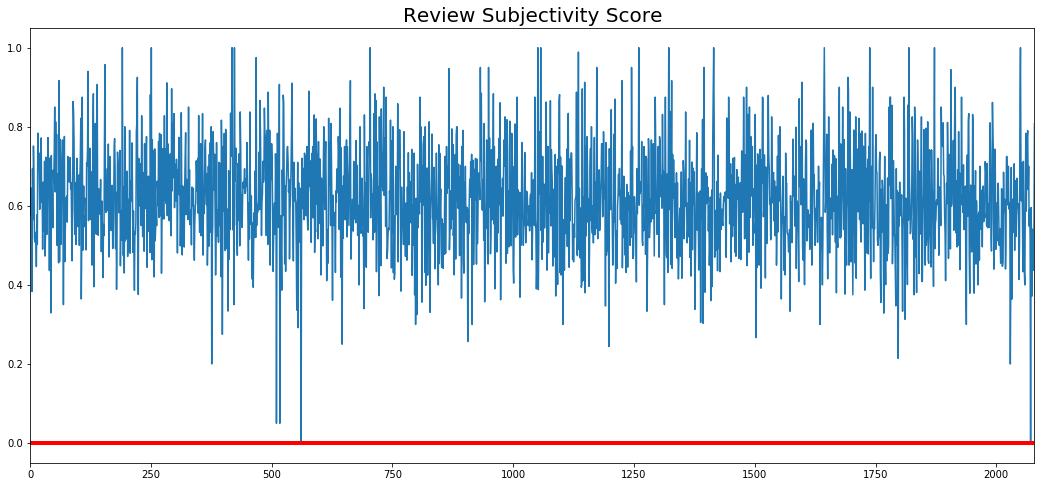

In [14]:
reviews['subjectivity'].plot(figsize=(18,8));
plt.title('Review Subjectivity Score',fontsize = 20);
plt.axhline(y=0, linewidth=4, color='r');

In [15]:
nlp = spacy.load("en_core_web_sm")
analyser = SentimentIntensityAnalyzer()

In [16]:
# Maintaining a super set of negative terms that even contains the existing terms(from existing txt file)
neg_list = []
with open('negative-words.txt', encoding='latin-1') as f:
    for line in f:
        line = line.replace('\n','')
        neg_list.append(str(line))

In [17]:
# function to identify the negative terms and update the existing dictionary with the terms that are not
# in the existing dictionary
def neg_terms(x):
    neg_wrd = []
    text = x.split('.')
    for i in text:    
        doc = nlp(i)    
        for tok in doc: 
            if tok.pos_ == 'ADJ' or tok.pos_ == 'VERB':
                pol = analyser.polarity_scores(tok.text)
                if pol.get('neg') > pol.get('pos'):
                    neg_wrd.append(tok.text)
                    if tok.text not in neg_list:
                        file1 = open("negative-words.txt","a") 
                        file1.writelines('\n' + str(tok.text))
                        neg_list.append(tok.text)
    return neg_wrd
                    
reviews['Negative Terms'] = reviews['review_new'].apply(neg_terms)            

In [18]:
# Maintaining a super set of positive terms that even contains the existing terms
pos_list = []
with open('positive-words.txt', encoding='latin-1') as f:
    for line in f:
        line = line.replace('\n','')
        pos_list.append(str(line))

In [19]:
# Identifying the positive terms in each of the reviews and appending the terms to existing list
def pos_terms(x):
    pos_wrd = []
    text = x.split('.')
    for i in text:    
        doc = nlp(i)    
        for tok in doc: 
            if tok.pos_ == 'ADJ' or tok.pos_ == 'VERB':
                pol = analyser.polarity_scores(tok.text)
                if pol.get('neg') < pol.get('pos'):
                    pos_wrd.append(tok.text)
                    if tok.text not in pos_list:
                        file1 = open("positive-words.txt","a") 
                        file1.writelines('\n' + str(tok.text))
                        pos_list.append(tok.text)
    return pos_wrd
                    
reviews['Positive Terms'] = reviews['review_new'].apply(pos_terms)

In [20]:
#Super set of aspect terms to be used in wordcloud later
asp_ss = [] 
def asp_terms(x):
    asp_wrd = []
    text = x.split('.')
    for i in text:    
        doc = nlp(i)    
        for tok in doc: 
            if tok.pos_ == 'NOUN' or tok.pos_ == 'PRONOUN':
                    asp_wrd.append(tok.text)
                    asp_ss.append(tok.text)
    return asp_wrd
                    
reviews['Aspect Terms'] = reviews['review_new'].apply(asp_terms)

In [21]:
reviews.head()

,Date,Rating,Review,Name,Location,Rating_v1,review_new,review_stemmer,review_lemmatizer,review_score,polarity,subjectivity,Negative Terms,Positive Terms,Aspect Terms
0,9/28/2017,4,i really liked their menu set up. fresh fish s...,Amy E.,"Fremont, CA",4.0 star rating,really liked menu set fresh fish selection cha...,realli like menu set fresh fish select chang d...,realli like menu set fresh fish select chang d...,"(0.3596590909090908, 0.575)",0.359659,0.575000,[stressful],"[liked, fresh, great, sweet, lol]","[menu, fish, selection, day, preparation, port..."
1,9/19/2017,5,went for dinner on our 1st night in maui..my s...,Jill C.,"Puerto Real, Puerto Rico",4.0 star rating,went dinner 1st night mauimy son 15 loves cook...,went dinner 1st night mauimi son 15 love cook ...,went dinner 1st night mauimi son 15 love cook ...,"(0.75, 0.5875)",0.750000,0.587500,[],"[loves, best, outstanding]","[dinner, night, restaurants, fish, caper, sauc..."
2,9/17/2017,3,beautiful beachfront restaurant in lahaina tow...,Saleen D.,"San Diego, CA",4.0 star rating,beautiful beachfront restaurant lahaina town b...,beauti beachfront restaur lahaina town beauti ...,beauti beachfront restaur lahaina town beauti ...,"(0.20606060606060603, 0.6450757575757576)",0.206061,0.645076,[wrong],"[beautiful, thank, gorgeous, friendly, good, p...","[town, restaurant, reservation, dine, table, v..."
3,8/31/2017,5,one of my my favorite restaurants in maui with...,Amber V.,"Las Vegas, NV",4.0 star rating,one favorite restaurants maui view food die ob...,one favorit restaur maui view food die obvious...,one favorit restaur maui view food die obvious...,"(0.24363636363636365, 0.59)",0.243636,0.590000,"[die, crash, die]","[favorite, want, fresh, wonderful, enjoying, r...","[restaurants, view, food, fish, steaks, dishes..."
4,9/22/2017,4,"after lunch, we wanted to go people watch on t...",Dan O.,"Madison Heights, MI",4.0 star rating,lunch wanted go people watch boardwalk later g...,lunch want go peopl watch boardwalk later grab...,lunch want go peopl watch boardwalk later grab...,"(0.3017857142857143, 0.3834325396825397)",0.301786,0.383433,[],"[great, sure, love]","[lunch, people, drink, door, pavaillion, water..."


In [22]:
#Frequency Distribution for Wordcloud
fdist = FreqDist(asp_ss)
topterms = fdist.most_common(50)

In [23]:
# concatenating the top terms from the list to be passed onto the wordcloud
term_str = ' '
for a, c in topterms:
    term_str = term_str + a + ' '

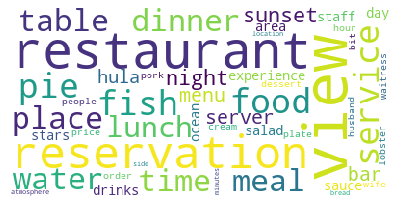

In [24]:
# Generates the wordcloud of top aspect terms (top 50)
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300).generate(term_str)
plt.imshow(wordcloud)
wordcloud.to_file("wordcloud_aspect_terms.png")
plt.tight_layout()
plt.axis("off")
plt.show()

In [25]:
#Definig a pattern for words to retrieve the required N-grams
# Since we requires aspect related n grams, our patterns allow aspect terms with its adjective or verb
ngrams_wc = []
def sp_pattern(x):
    ngrams_ss = []
    n_g = []
    n_g1 = []
    n_g2 = []
    n_g3 = []
    n_g4 = []
    n_g5 = []
    matcher = Matcher(nlp.vocab)
    text = x.split('.')
    for i in text:    
        doc = nlp(i)    
        pattern = [
                {'POS': 'VERB'}, 
                {'POS': 'NOUN'},
                {'POS': 'NOUN', 'OP': '?'},
                ]

        pattern1 = [
                {'POS': 'ADJ'}, 
                {'POS': 'NOUN'},
                {'POS': 'NOUN', 'OP': '?'},
                ]

        pattern2 = [
                {'DEP': 'ROOT', 'OP': '?'},
                {'POS': 'ADJ'}, 
                {'POS': 'PROPN'},
                ]

        pattern3 = [
                {'POS': 'ADJ'}, 
                {'POS': 'VERB'},
                ]

        pattern4 = [
                {'POS': 'PROPN', 'OP': '?'}, 
                {'POS': 'NOUN'},
                {'POS': 'ADJ'},
                ]

        pattern5 = [ 
                {'POS': 'VERB'},
                {'POS': 'PROPN'},
                ]
        
        matcher.add('PATTERN', None, pattern)

        if len(i) > 1:
            matches = matcher(doc)
            for match_id, start, end in matches:
                # Get the matched span
                ngrams = doc[start:end]
                n_g.append(ngrams.lemma_)
                ngrams_ss.append(ngrams.lemma_)
                ngrams_wc.append(ngrams.lemma_)
 
        matcher.add('PATTERN1', None, pattern1)
        if len(i) > 1:
            matches = matcher(doc)
            for match_id, start, end in matches:
                # Get the matched span
                ngrams = doc[start:end]
                if ngrams.lemma_ not in n_g:
                    n_g1.append(ngrams.lemma_)
                    ngrams_ss.append(ngrams.lemma_)
                    ngrams_wc.append(ngrams.lemma_)

        matcher.add('PATTERN2', None, pattern2)
        if len(i) > 1:
            matches = matcher(doc)
            for match_id, start, end in matches:
                # Get the matched span
                ngrams = doc[start:end]
                if ngrams.lemma_ not in n_g and ngrams.lemma_ not in n_g1:
                    n_g2.append(ngrams.lemma_)
                    ngrams_ss.append(ngrams.lemma_)
                    ngrams_wc.append(ngrams.lemma_)
            
        matcher.add('PATTERN3', None, pattern3)
        if len(i) > 1:
            matches = matcher(doc)
            for match_id, start, end in matches:
                # Get the matched span
                ngrams = doc[start:end]
                if ngrams.lemma_ not in n_g and ngrams.lemma_ not in n_g1 and ngrams.lemma_ not in n_g2:
                    n_g3.append(ngrams.lemma_)
                    ngrams_ss.append(ngrams.lemma_)
                    ngrams_wc.append(ngrams.lemma_)
            
        matcher.add('PATTERN4', None, pattern4)
        if len(i) > 1:
            matches = matcher(doc)
            for match_id, start, end in matches:
                # Get the matched span
                ngrams = doc[start:end]
                if ngrams.lemma_ not in n_g and ngrams.lemma_ not in n_g1 and ngrams.lemma_ not in n_g2 and ngrams.lemma_ not in n_g3:
                    n_g4.append(ngrams.lemma_)
                    ngrams_ss.append(ngrams.lemma_)
                    ngrams_wc.append(ngrams.lemma_)
            
        matcher.add('PATTERN5', None, pattern5)
        if len(i) > 1:
            matches = matcher(doc)
            for match_id, start, end in matches:
                # Get the matched span
                ngrams = doc[start:end]
                if ngrams.lemma_ not in n_g and ngrams.lemma_ not in n_g1 and ngrams.lemma_ not in n_g2 and ngrams.lemma_ not in n_g3 and ngrams.lemma_ not in n_g4:
                    n_g5.append(ngrams.lemma_)
                    ngrams_ss.append(ngrams.lemma_)
                    ngrams_wc.append(ngrams.lemma_)
    
    return ngrams_ss

In [26]:
# configuring n grams from each customer review
reviews['Ngrams'] = reviews['review_new'].apply(sp_pattern)

In [27]:
fdist = FreqDist(ngrams_wc)
topterms_ng = fdist.most_common(50)

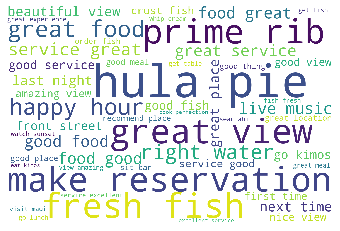

In [28]:
# wordcloud of the n grams retrieved
mylist = []
for a,c in topterms_ng:
    mylist.append(a)

wordc=Counter(mylist)

wordcloud = WordCloud(stopwords=STOPWORDS, width = 1500, height = 1000,
                          background_color='white', 
                      max_words=300).generate_from_frequencies(wordc)
wordcloud.to_file("wordcloud_n_grams.png")
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

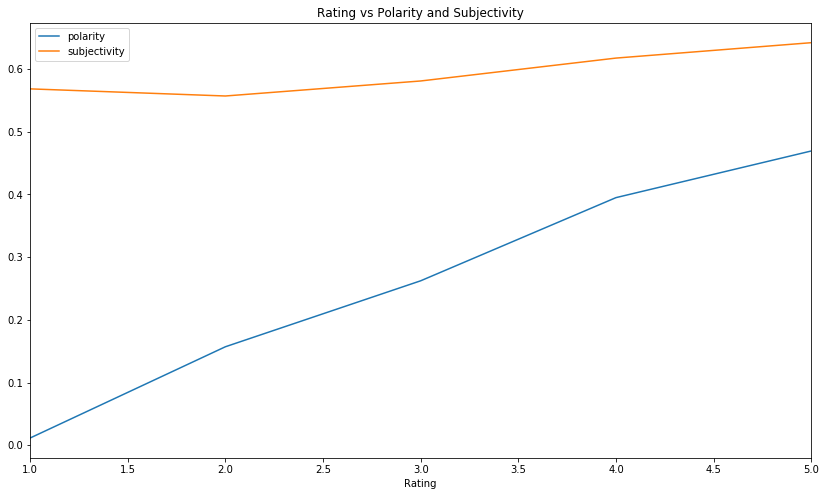

In [29]:
df_review = reviews.groupby(['Rating']).mean()
df_review
df_review.plot(figsize=(14,8),title = 'Rating vs Polarity and Subjectivity');

In [30]:
term = term_str.split(' ')

In [31]:
while('' in term): 
    term.remove('') 

In [32]:
# Maintaining a separate date frame for the aspect count to be later used in tableau
# Below function identifies the N gram terms for the respective Aspect
df_aspect = pd.DataFrame(columns = ['Aspect', 'Ngrams', 'Neg Reviews', 'Negative count', 'Positive count', 'Total'])
pol_dict = {}

for i in term:
    ngram_list = []
    for n in ngrams_wc:
        if i in n:
            ngram_list.append(n)
    pol_dict[i] = ngram_list

In [33]:
df_aspect['Aspect'] = pol_dict.keys()

In [34]:
df_aspect['Ngrams'] = pol_dict.values()

In [35]:
df_aspect

,Aspect,Ngrams,Neg Reviews,Negative count,Positive count,Total
0,food,"[sound ocean food, food outstanding, good food...",NaN,NaN,NaN,NaN
1,fish,"[fresh fish, fresh fish selection, crust fish,...",NaN,NaN,NaN,NaN
2,service,"[friendly customer service, service good, star...",NaN,NaN,NaN,NaN
3,pie,"[original hula pie, hula pie, fabulous hula pi...",NaN,NaN,NaN,NaN
4,view,"[gorgeous view, view friendly, maui view, maui...",NaN,NaN,NaN,NaN
5,place,"[popular place, great place, replace menu, say...",NaN,NaN,NaN,NaN
6,dinner,"[go dinner, recent dinner, nice dinner, dinner...",NaN,NaN,NaN,NaN
7,time,"[next time, next time repeat, fitting bikini t...",NaN,NaN,NaN,NaN
8,table,"[get table, table right, seat table, fellow di...",NaN,NaN,NaN,NaN
9,water,"[face water, water great, right water, right w...",NaN,NaN,NaN,NaN


In [36]:
# Identifying the sentiments of the aspects by use of positive and negative terms in addition to the 
# polarity score

analyser = SentimentIntensityAnalyzer()
def polarity_analyser(x):
    neg_grm = []
    for i in x:
        ng = i.split(' ')
        pol = analyser.polarity_scores(i)
        if pol.get('neg') > pol.get('pos'):
            neg_grm.append(i)
        if pol.get('neu') == 1.0 and [i for i in ng if i in neg_list]:
            neg_grm.append(i)
    return neg_grm

In [37]:
df_aspect['Neg Reviews'] = df_aspect['Ngrams'].apply(polarity_analyser)

In [38]:
# Identifying the sentiments of the aspects by use of negative terms in addition to the 
# polarity score and keeping the count

def neg_polarity_analyser(x):
    neg_count = 0
    for i in x:
        ng = i.split(' ')
        pol = analyser.polarity_scores(i)
        if pol.get('neg') > pol.get('pos'): 
            neg_count += 1
            #print(i)
        if pol.get('neu') == 1.0 and [i for i in ng if i in neg_list]:
            #print(i)
            neg_count += 1
    return neg_count

In [39]:
df_aspect['Negative count'] = df_aspect['Ngrams'].apply(neg_polarity_analyser)

In [40]:
# Identifying the sentiments of the aspects by use of positive terms in addition to the 
# polarity score and keeping the count

def pos_polarity_analyser(x):
    pos_count = 0
    for i in x:
        ng = i.split(' ')
        pol = analyser.polarity_scores(i)
        if pol.get('neg') > pol.get('pos'):
            pass
        elif pol.get('pos') > pol.get('neu'):
            pos_count += 1
        elif pol.get('neu') == 1.0 and [i for i in ng if i in pos_list]:
            pass
    return pos_count

In [41]:
df_aspect['Positive count'] = df_aspect['Ngrams'].apply(pos_polarity_analyser)

In [42]:
#Retrieving the total ngram count to identify the rest of ngrams as Neutral polarity terms
def tot_polarity_analyser(x):
    count = 0
    for i in x:
        ng = i.split(' ')
        count += 1
        pol = analyser.polarity_scores(i)
        if pol.get('neg') > pol.get('pos'):
            pass
        elif pol.get('pos') > pol.get('neg'):
            pass
        elif pol.get('neu') == 1.0 and [i for i in ng if i in neg_list]:
            pass
        elif pol.get('neu') == 1.0 and [i for i in ng if i in pos_list]:
            pass
        else:
            pass
            #print(i, analyser.polarity_scores(i))
    return count

In [43]:
df_aspect['Total'] = df_aspect['Ngrams'].apply(tot_polarity_analyser)

In [44]:
# maintaining the percentage of positive and negative scores of each aspect excluding Neutral terms
df_aspect['Negative percentage'] = (df_aspect['Negative count'] / (df_aspect['Negative count'] + df_aspect['Positive count'])) * 100
df_aspect['Positive percentage'] = (df_aspect['Positive count'] / (df_aspect['Negative count'] + df_aspect['Positive count'])) * 100

In [45]:
df_aspect

,Aspect,Ngrams,Neg Reviews,Negative count,Positive count,Total,Negative percentage,Positive percentage
0,food,"[sound ocean food, food outstanding, good food...","[lackluster food, mediocre food, dry seafood, ...",188,973,1705,16.192937,83.807063
1,fish,"[fresh fish, fresh fish selection, crust fish,...","[salsa fish small, fish small, cold fish, fish...",119,618,1461,16.146540,83.853460
2,service,"[friendly customer service, service good, star...","[starve point service, crash service, poor ser...",95,691,972,12.086514,87.913486
3,pie,"[original hula pie, hula pie, fabulous hula pi...","[hula pie desert, piece small, dry hula pie, d...",40,199,871,16.736402,83.263598
4,view,"[gorgeous view, view friendly, maui view, maui...","[leave review, leave review photo, previous re...",77,804,1265,8.740068,91.259932
5,place,"[popular place, great place, replace menu, say...","[wait place, bad place, bad place dinner, busy...",73,401,785,15.400844,84.599156
6,dinner,"[go dinner, recent dinner, nice dinner, dinner...","[make dinner, make dinner reservation, make an...",64,237,658,21.262458,78.737542
7,time,"[next time, next time repeat, fitting bikini t...","[time busy, tough time, waste time, waste time...",47,127,579,27.011494,72.988506
8,table,"[get table, table right, seat table, fellow di...","[dish lacking vegetable, table terrible, book ...",91,162,690,35.968379,64.031621
9,water,"[face water, water great, right water, right w...","[low deck water, stuck water, stuck water wait...",36,105,506,25.531915,74.468085


In [46]:
df_aspect.to_csv(r'aspect_polarity.csv', index = False)

In [47]:
# frequently used ngram for each aspect term is maintained in a wordcloud
t_list = []
def top_freq(x):
    fdist = FreqDist(x)
    topterms_tf = fdist.most_common(1)
    
    for a,c in topterms_tf:
        t_list.append(a)
df_aspect['Neg Reviews'].apply(top_freq)

0     None
1     None
2     None
3     None
4     None
5     None
6     None
7     None
8     None
9     None
10    None
11    None
12    None
13    None
14    None
15    None
16    None
17    None
18    None
19    None
20    None
21    None
22    None
23    None
24    None
25    None
26    None
27    None
28    None
29    None
30    None
31    None
32    None
33    None
34    None
35    None
36    None
37    None
38    None
39    None
40    None
41    None
42    None
43    None
44    None
45    None
46    None
47    None
48    None
49    None
Name: Neg Reviews, dtype: object

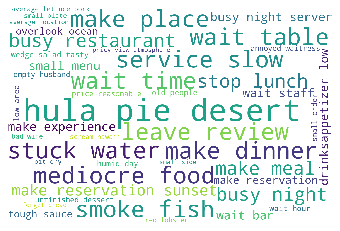

In [48]:
wordc=Counter(t_list)

wordcloud = WordCloud(stopwords=STOPWORDS, width = 1500, height = 1000,
                          background_color='white', 
                      max_words=300).generate_from_frequencies(wordc)
wordcloud.to_file("wordcloud_n_grams.png")
plt.imshow(wordcloud)
plt.axis("off")
plt.show()